<a href="https://colab.research.google.com/github/relaycharger/Google_Colab/blob/Color-color-swatch/Swatch_Lab_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Jupyter Notebook for Color Swatching in the *Lab* Color Space

_______________________________________________________________________________
-------------------------------------------------------------------------------

#Lab Color Space
#The best tool for color conversion and for getting a precise color reading when trying to precisely reproduce a color

https://graphicdesign.stackexchange.com/questions/104853/lab-color-space-in-photoshop

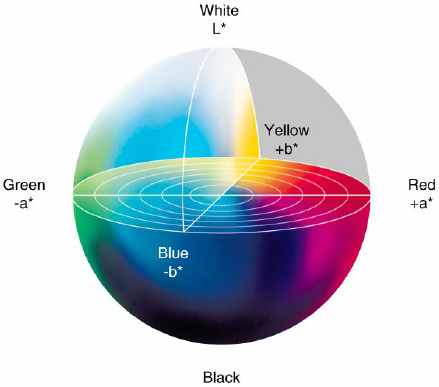

________________________________________________________________________________

#Overview

#Convert this:
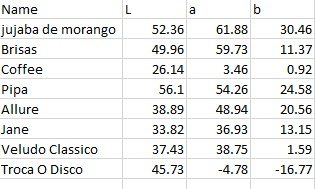

#To this:

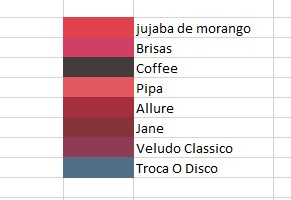

________________________________________________________________________________

#Installing necessary packages

In [ ]:
pip install pandas openpyxl scikit-image matplotlib

#Importing functions to be used

In [ ]:
import pandas as pd
from openpyxl import Workbook
from openpyxl.styles import PatternFill
from skimage import color
import numpy as np
import matplotlib.colors as mcolors

#Example Excel for upload - Notice the headers
Headers must be in this format:
Notice which letters are capitalized (important)

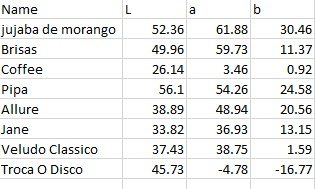



#Uploading the data file (Lab values) in MS Excel

In [ ]:
# Read the CSV file
#df = pd.read_csv('/content/sample_data/Lab_values.csv')

#The exact path to the data file. We have the option for MS Excel here. CSV option is above. Either file type is fine.
df = pd.read_excel('/content/Dior_addict_run_2.xlsx')



#Color Swatching Lab values and saving the results

In [ ]:
# Extract the Lab values
lab_values = df[['L', 'a', 'b']]
names = df['Name']

# Convert Lab values to aRGB hex format
def lab_to_argb_hex(L, a, b):
    lab = [[L, a, b]]
    rgb = color.lab2rgb(lab)[0]
    rgb_scaled = np.clip(rgb * 255, 0, 255).astype(int)
    argb_hex = '{:02X}{:02X}{:02X}{:02X}'.format(
        255, rgb_scaled[0], rgb_scaled[1], rgb_scaled[2]
    )
    return argb_hex

# Create a new Excel workbook and select the active sheet
workbook = Workbook()
sheet = workbook.active

# Create a color swatch in Excel
for row, (lab, name) in enumerate(zip(lab_values.values, names), start=1):
    # Convert Lab to aRGB hex format
    argb_hex_value = lab_to_argb_hex(*lab)
    fill = PatternFill(start_color=argb_hex_value, end_color=argb_hex_value, fill_type='solid')
    sheet.cell(row=row, column=1).fill = fill
    sheet.cell(row=row, column=2).value = name
    # Set column widths
sheet.column_dimensions['A'].width = 10
sheet.column_dimensions['B'].width = 20

# Save the workbook to an Excel file. We can specify the path and name of the ouptut file.
workbook.save('run_2.xlsx')

#The last line in the above code workbook.save('run_2.xlsx')  controls the name and path of the output file. May be edited to suite your preferences.
#In this case the file name is run_2.xlsx and the path has defaulted to C: Jupyter xxxx or online at Google Colaboratory